In [1]:
####Ryan Blow

In [2]:
from microphone import record_audio
import numpy as np
listen_time=5
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion 
from scipy.ndimage.morphology import iterate_structure
import pickle
from collections import Counter

In [6]:
notes={}
notes["C 0"]=16.351
notes["C sharp/D flat 0"]=17.324
notes["D 0"]=18.354
notes["D sharp/E flat 0"]=19.445
notes["E 0"]=20.601
notes["F 0"]=21.827
notes["F sharp/G flat 0"]=23.124
notes["G 0"]=24.499
notes["G sharp/A flat 0"]=25.956
notes["A 0"]=27.5
notes["A sharp/B flat 0"]=29.135
notes["B 0"]=30.868
notes["C 1"]=32.703
notes["C sharp/D flat 1"]=34.648
notes["D 1"]=36.708
notes["D sharp/E flat 1"]=38.891
notes["E 1"]=41.203
notes["F 1"]=43.654
notes["F sharp/G flat 1"]=46.249
notes["G 1"]=48.999
notes["G sharp/A flat 1"]=51.913
notes["A 1"]=55
notes["A sharp/B flat 1"]=58.27
notes["B 1"]=61.735
notes["C 2"]=65.406
notes["C sharp/D flat 2"]=69.296
notes["D 2"]=73.416
notes["D sharp sharp/E flat 2"]=77.782
notes["E 2"]=82.407
notes["F 2"]=87.307
notes["F sharp/G flat 2"]=92.499
notes["G 2"]=97.999
notes["G sharp/A flat 2"]=103.826
notes["A 2"]=110
notes["A sharp/B flat 2"]=116.541
notes["B 2"]=123.471
notes["C 3"]=130.813
notes["C sharp/D flat 3"]=138.591
notes["D 3"]=146.832
notes["D sharp/E flat 3"]=155.563
notes["E 3"]=164.814
notes["F 3"]=174.614
notes["F sharp/G flat 3"]=184.997
notes["G 3"]=195.998
notes["G sharp/A flat 3"]=207.652
notes["A 3"]=220
notes["A sharp/B flat 3"]=233.082
notes["B 3"]=246.942
notes["C 4"]=261.626
notes["C sharp/D flat 4"]=277.183
notes["D 4"]=293.665
notes["D sharp/E flat 4"]=311.127
notes["E 4"]=329.628
notes["F 4"]=349.228
notes["F sharp/G flat 4"]=369.994
notes["G 4"]=391.995
notes["G sharp/A flat 4"]=415.305
notes["A 4"]=440
notes["A sharp/B flat 4"]=466.164
notes["B 4"]=493.883
notes["C 5"]=523.251
notes["C sharp/D flat 5"]=554.365
notes["D 5"]=587.33
notes["D sharp/E flat 5"]=622.254
notes["E 5"]=659.255
notes["F 5"]=698.456
notes["F sharp/G flat 5"]=739.989
notes["G 5"]=783.991
notes["G sharp/A flat 5"]=830.609
notes["A 5"]=880
notes["A sharp/B flat 5"]=932.328
notes["B 5"]=987.767
notes["C 6"]=1046.502
notes["C sharp/D flat 6"]=1108.731
notes["D 6"]=1174.659
notes["D sharp/E flat 6"]=1244.508
notes["E 6"]=1318.51
notes["F 6"]=1396.913
notes["F sharp/G flat 6"]=1479.978
notes["G 6"]=1567.982
notes["G sharp/A flat 6"]=1661.219
notes["A 6"]=1760
notes["A sharp/B flat 6"]=1864.655
notes["B 6"]=1975.533
notes["C 7"]=2093.005
notes["C sharp/D flat 7"]=2217.461
notes["D 7"]=2349.318
notes["D sharp/E flat 7"]=2489.016
notes["E 7"]=2637.021
notes["F 7"]=2793.826
notes["F sharp/G flat 7"]=2959.955
notes["G 7"]=3135.964
notes["G sharp/A flat 7"]=3322.438
notes["A 7"]=3520
notes["A sharp/B flat 7"]=3729.31
notes["B 7"]=3951.066
notes["C 8"]=4186.009
notes["C sharp/D flat 8"]=4434.922
notes["D 8"]=4698.636
notes["D sharp/E flat 8"]=4978.032
notes["E 8"]=5274.042
notes["F 8"]=5587.652
notes["F sharp/G flat 8"]=5919.91
notes["G 8"]=6271.928
notes["G sharp/A flat 8"]=6644.876
notes["A 8"]=7040
notes["A sharp/B flat 8"]=7458.62
notes["B 8"]=7902.132
notes["C 9"]=8372.018
notes["C sharp/D flat 9"]=8869.844
notes["D 9"]=9397.272
notes["D sharp/E flat 9"]=9956.064
notes["E 9"]=10548.084
notes["F 9"]=11175.304
notes["F sharp/G flat 9"]=11839.82
notes["G 9"]=12543.856
notes["G sharp/A flat 9"]=13289.752
notes["A 9"]=14080
notes["A sharp/B flat 9"]=14917.24
notes["B 9"]=15804.264
with open("notes.pkl", mode="wb") as opened_file:
    pickle.dump(notes, opened_file)

In [15]:
def recognize_notes():
    frames, sample_rate = record_audio(listen_time)
    audio_data = np.hstack([np.frombuffer(i, np.int16) for i in frames])
    time = np.arange(len(audio_data)) * sample_rate # corresponding time (sec) for each sample
    #fig, ax = plt.subplots()
    sampling_rate=44100
    fig, ax = plt.subplots()

    S, freqs, times, im = ax.specgram(audio_data, NFFT=4096, Fs=sampling_rate,
                                  window=mlab.window_hanning,
                                  noverlap=4096 // 2)
    ax.set_ylim(0,2500)
    sum_S=S.sum(axis=1)
    freq=[]
    print(sum_S.shape)
    for i in range(len(sum_S)):
        if sum_S[i]>20000:
            print(sum_S[i])
            print(i)
            freq_bins=freqs[i]
            freq.append(freq_bins)
    with open("notes.pkl", mode="rb") as opened_file:
        notes_dic = pickle.load(opened_file)
    notes_reversed = dict(map(reversed, notes_dic.items()))
    notes_list_values=[i for i in notes_dic.values()]
    notes_keys=[i for i in notes_dic.keys()]
    frequencies_array_pickle=np.array(notes_list_values)
    notes=[]
    for i in range(len(freq)):
        if freq[i]<130.8 or freq[i]>2093:
            i=i
        else:
            difference_array=frequencies_array_pickle-freq[i]
            lowest_freq=np.min(np.abs(difference_array))
            if lowest_freq not in difference_array:
                lowest_freq=lowest_freq*-1
            note_freq=np.around(lowest_freq+freq[i], decimals=3)
            real_note=notes_reversed[note_freq]
            for i in range(len(notes_keys)):
                if notes_keys[i] is real_note:
                    notes.append(notes_keys[i])
    counter=Counter(notes)
    guess=counter.most_common()
    guesses_notes=[]
    for values in range(len(guess)):
        guesses_notes.append(guess[values][0])
    guesses=" and ".join(guesses_notes)
    guesses="you played" + guesses
    return guesses

Using input device 'Microphone Array (Realtek High'
Recording ended


<IPython.core.display.Javascript object>


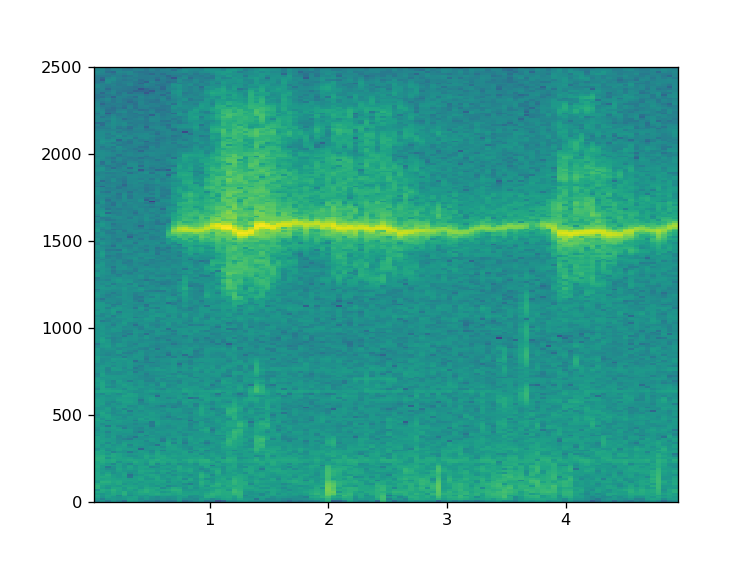

(2049,)
32297.330407887686
140
350573.59757481073
141
5351022.17318151
142
17070486.89060019
143
12385841.474863473
144
12251334.127265017
145
27153017.576980535
146
27233096.912409183
147
9846862.844512686
148
1119965.7004938938
149
81433.03456852402
150
34799.93853681088
151
25514.98734547524
152
21498.95200960072
153
22512.017115667008
154


'you playedG_6 and G#/Ab_6 and F#/Gb_6'

In [16]:
recognize_notes()